## 1. K-Nearest Neighbors (KNN):

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Downloads/Hotel Reservations.csv')

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
columns=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

for i in columns:
    print('Number of zero value of ' + i, df[df[i]==0].shape[0])

Number of zero value of no_of_adults 139
Number of zero value of no_of_children 33577
Number of zero value of no_of_weekend_nights 16872
Number of zero value of no_of_week_nights 2387
Number of zero value of required_car_parking_space 35151
Number of zero value of lead_time 1297
Number of zero value of arrival_year 0
Number of zero value of arrival_month 0
Number of zero value of arrival_date 0
Number of zero value of repeated_guest 35345
Number of zero value of no_of_previous_cancellations 35937
Number of zero value of no_of_previous_bookings_not_canceled 35463
Number of zero value of avg_price_per_room 545
Number of zero value of no_of_special_requests 19777


In [ ]:
for i in columns:
    df[i] = df[i].replace(0, np.NaN)
    mean = int(df[i].mean(skipna=True))
    df[i] = df[i].replace(np.NaN, mean)

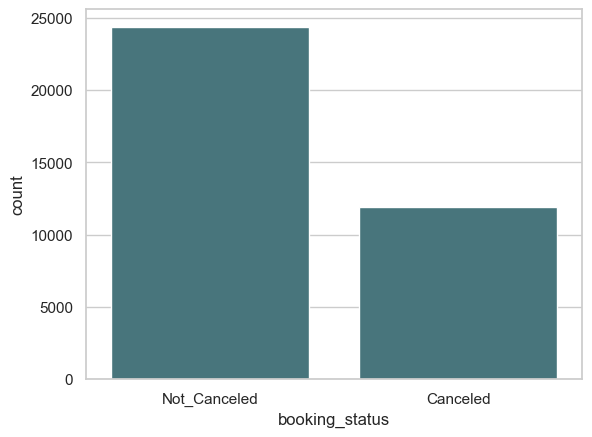

In [ ]:
sns.countplot(df, x='booking_status');

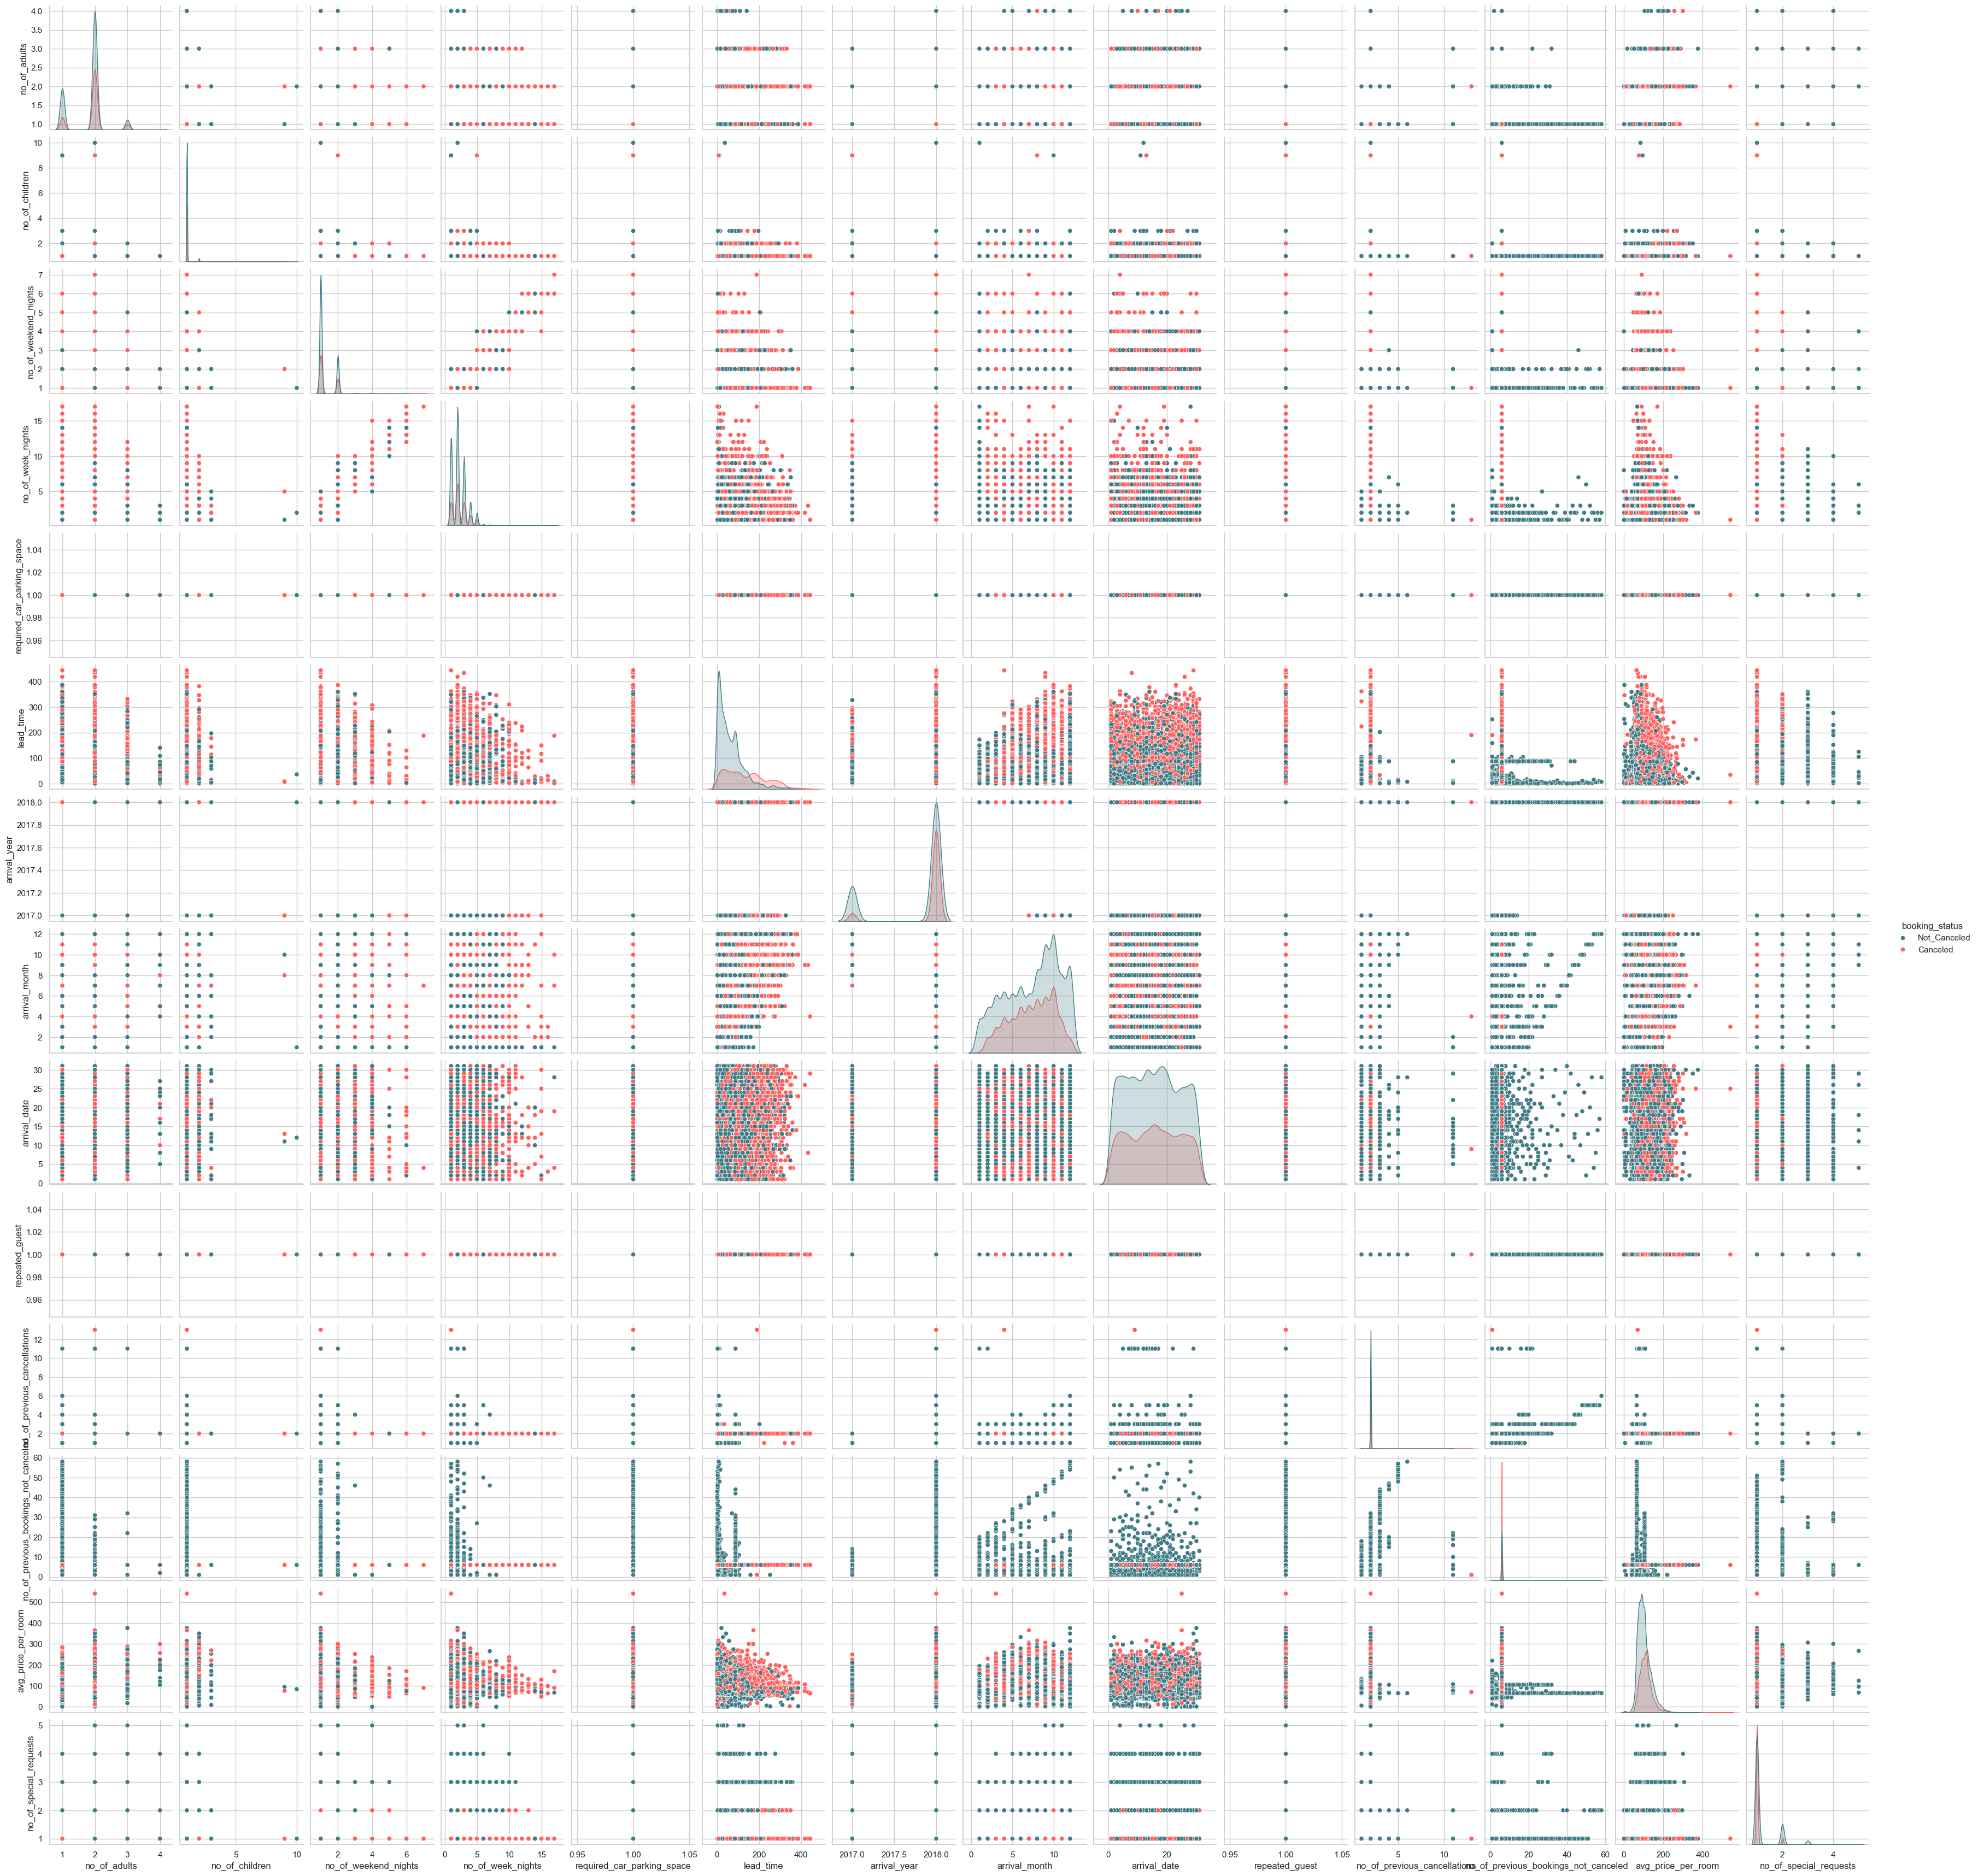

In [ ]:
sns.pairplot(df, hue="booking_status");

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in df.columns:
    df[column] = label.fit_transform(df[column])

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,1,0,0,1,0,0,0,223,0,9,1,3,0,1,5,342,0,1
1,1,1,0,1,2,3,0,0,4,1,10,5,4,0,1,5,1911,0,1
2,2,0,0,1,0,0,0,0,0,1,1,27,4,0,1,5,237,0,0
3,3,1,0,0,1,0,0,0,210,1,4,19,4,0,1,5,1644,0,0
4,4,1,0,0,0,3,0,0,47,1,3,10,4,0,1,5,1434,0,0


<Axes: >

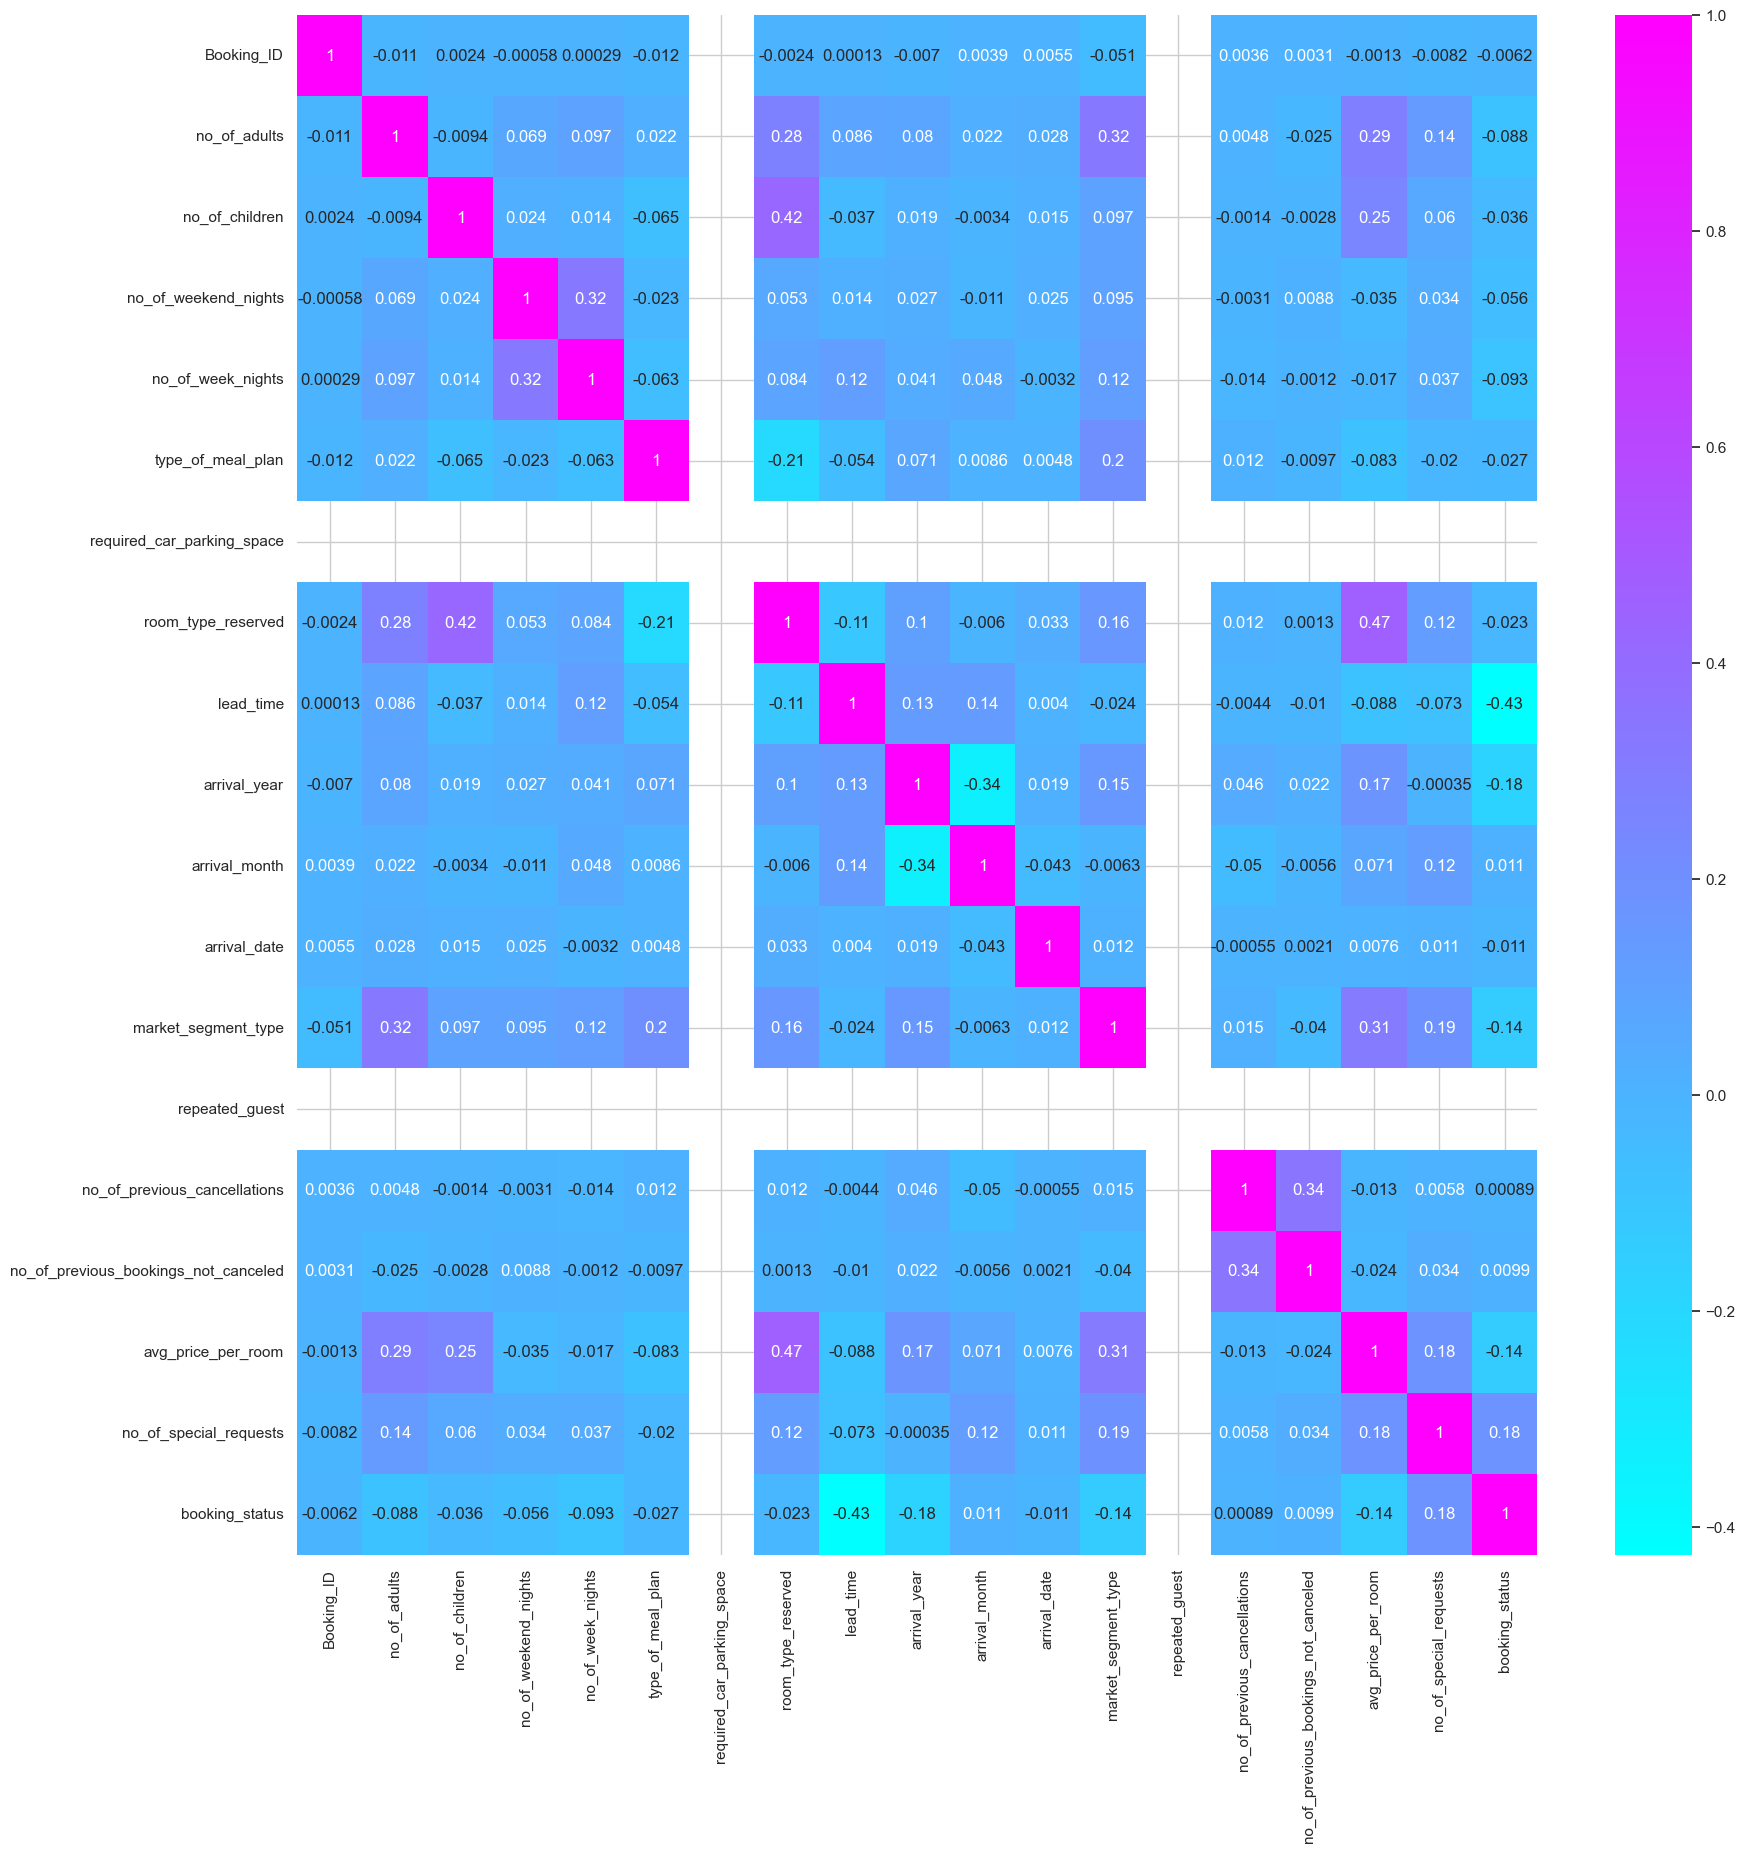

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(df.corr(), cmap="cool", annot=True)

<Axes: xlabel='market_segment_type', ylabel='no_of_special_requests'>

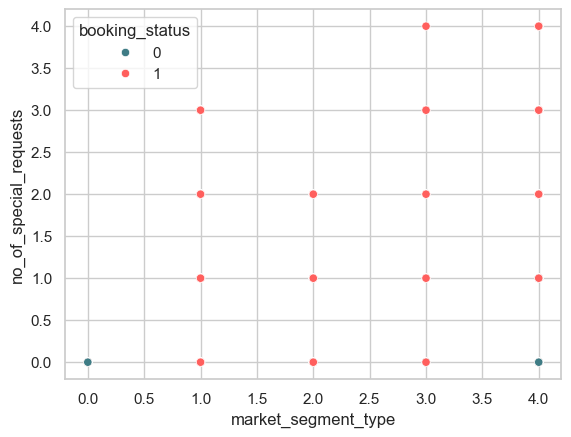

In [ ]:
sns.scatterplot(x="market_segment_type", y="no_of_special_requests", hue="booking_status", data=df)

<Axes: xlabel='avg_price_per_room', ylabel='no_of_special_requests'>

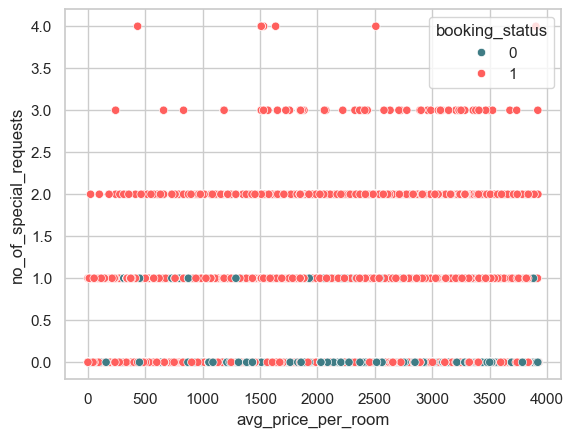

In [ ]:
sns.scatterplot(x="avg_price_per_room", y="no_of_special_requests", hue="booking_status", data=df)

<Axes: xlabel='avg_price_per_room', ylabel='no_of_children'>

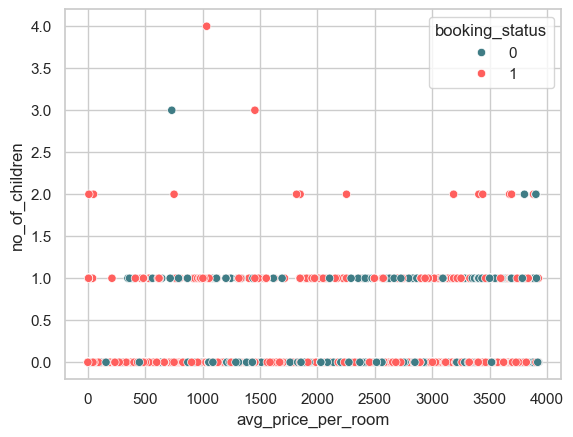

In [ ]:
sns.scatterplot(x="avg_price_per_room", y="no_of_children", hue="booking_status", data=df)

<Axes: xlabel='avg_price_per_room', ylabel='room_type_reserved'>

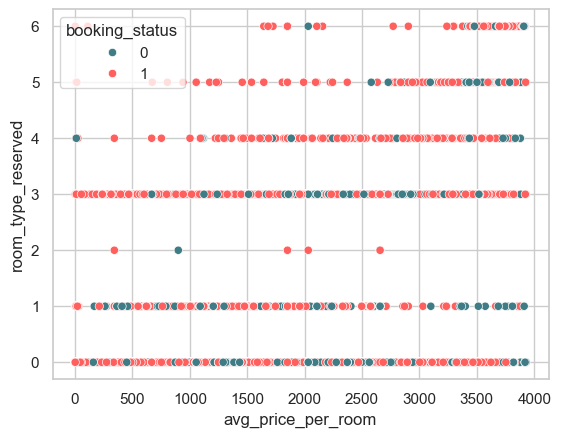

In [ ]:
sns.scatterplot(x="avg_price_per_room", y="room_type_reserved", hue="booking_status", data=df)

In [ ]:
cancelled = df[df["booking_status"]==1]
not_cancelled = df[df["booking_status"]==0]

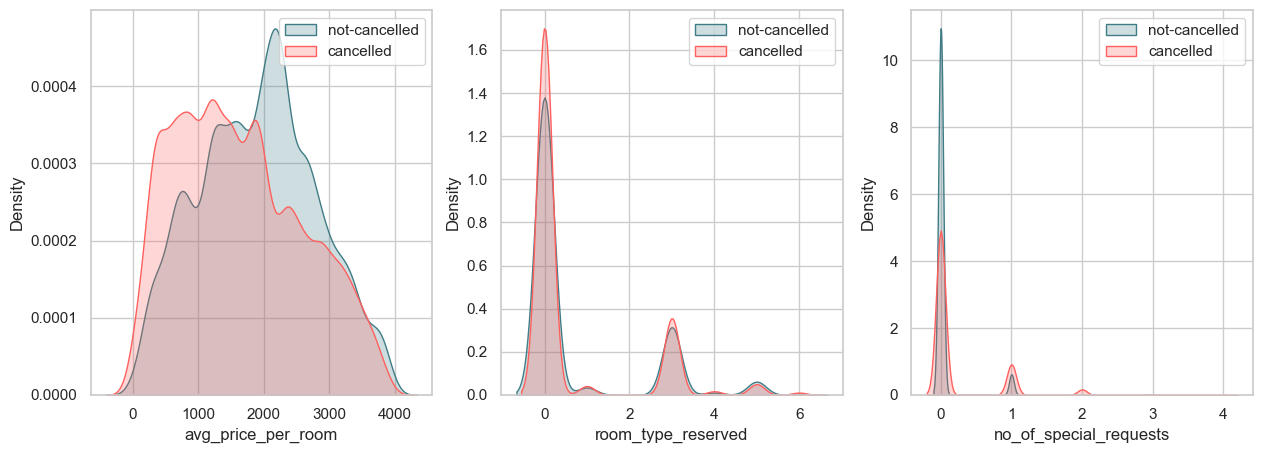

In [ ]:
plt.figure(figsize=(15,5))
for idx, v in enumerate(['avg_price_per_room', 'room_type_reserved', 'no_of_special_requests']):
    plt.subplot(1, 3, idx+1)
    sns.kdeplot(x = v, data = not_cancelled, label="not-cancelled", fill=True)
    sns.kdeplot(x = v, data = cancelled, label="cancelled", fill=True);
    plt.legend()

<Axes: xlabel='avg_price_per_room', ylabel='room_type_reserved'>

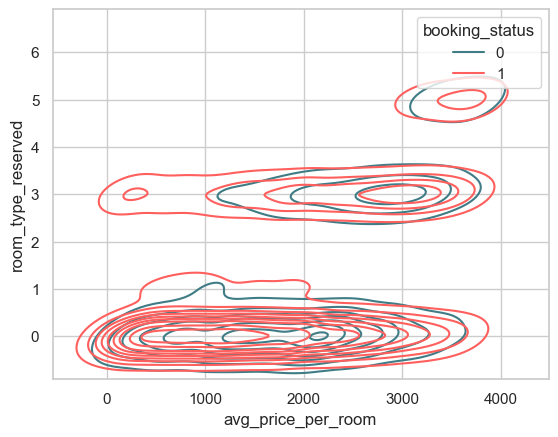

In [ ]:
sns.kdeplot(x="avg_price_per_room", y="room_type_reserved", data=df,hue="booking_status")

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

In [ ]:
print(f"{X.shape=}")
print(f"{y.shape=}")

X.shape=(36275, 18)
y.shape=(36275,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((27206, 18), (9069, 18))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(f"{X_train.min(axis=0)}")
print("----------------------------------")
print(f"{X_train.max(axis=0)}")

[-1.72647742 -1.6738083  -0.17379498 -0.54771061 -1.03896757 -0.49209362
  0.         -0.50726374 -1.04772503 -2.13068266 -2.092112   -1.67428822
 -5.20431102  0.         -5.37549194 -3.46730546 -1.81656991 -0.3768117 ]
----------------------------------
[ 1.73327085  4.25248381 16.83435675 11.40497504 11.45781129  2.37448958
  0.          3.7660347   3.17224211  0.46933315  1.48818907  1.75873198
  0.65959818  0.         32.18530192 35.88668387  2.35099239  8.82564702]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5,
                                  metric = 'minkowski',
                                  p = 2 )
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"{tn=},{fp=},{fn=},{tp=}")

tn=1945,fp=1062,fn=812,tp=5250


In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)

<Axes: >

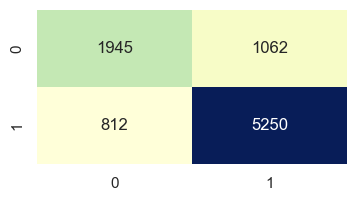

In [ ]:
plt.figure(figsize=(4,2))
sns.heatmap(confusion_mat, annot=True, fmt="g", cbar=False, cmap="YlGnBu")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.67      3007
           1       0.83      0.87      0.85      6062

    accuracy                           0.79      9069
   macro avg       0.77      0.76      0.76      9069
weighted avg       0.79      0.79      0.79      9069



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Accuracy: 0.7934
Precision: 0.8317
Recall: 0.8661


In [ ]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
test_accuracy

array([0.78222516, 0.74826331, 0.78928217, 0.77461683, 0.793362  ,
       0.78354835, 0.79534679, 0.78928217, 0.79744183, 0.79005403,
       0.79689051, 0.79214908, 0.79832396, 0.7936928 , 0.79953688,
       0.79876502, 0.79898556, 0.79854449, 0.80074981])

Text(0, 0.5, 'Accuracy')

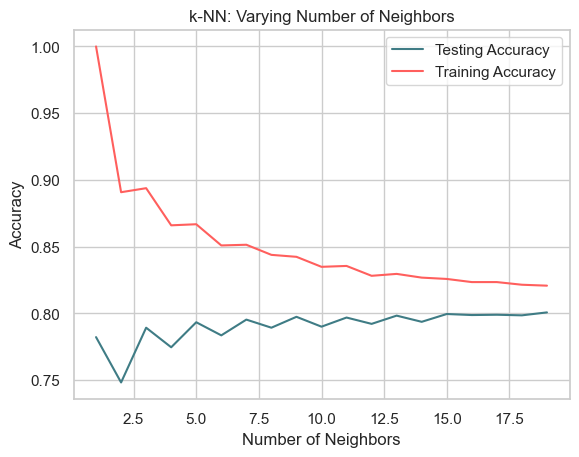

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

[0.21777483735803285, 0.2517366854118425, 0.21071782997022825, 0.2253831734480097, 0.20663799757415371, 0.2164516484728195, 0.20465321424633368, 0.21071782997022825, 0.20255816517807917, 0.20994596978718713, 0.2031094938802514, 0.20785092071893263, 0.2016760392546036, 0.20630720035285036, 0.20046311610982467, 0.2012349762928658, 0.2010144448119969, 0.2014555077737347, 0.19925019296504576, 0.2045429485058992, 0.20024258462895578, 0.203991619803727, 0.2026684309185136, 0.203991619803727, 0.20035285036939024, 0.20299922813981697, 0.2012349762928658, 0.2035505568419892, 0.2035505568419892]
Minimum error: 0.19925019296504576 at K = 18


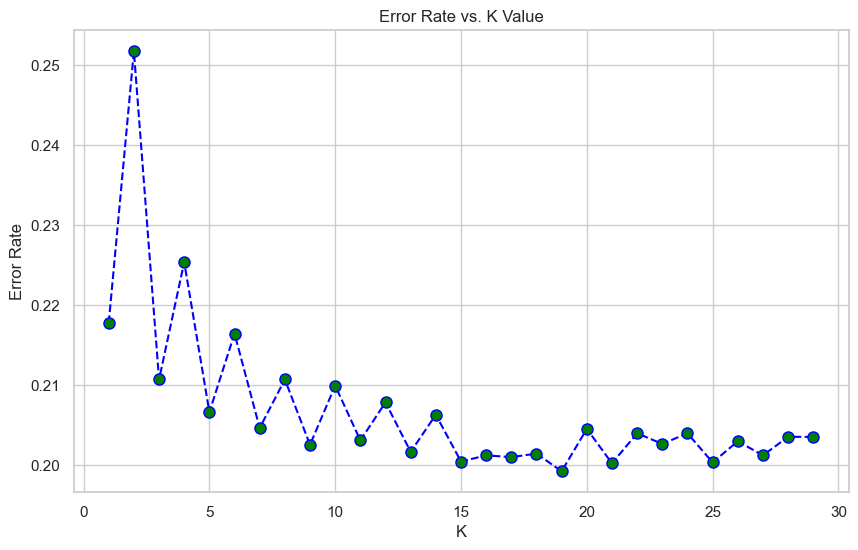

In [ ]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predct = knn.predict(X_test)
    error_rate.append(np.mean(predct != y_test))
print(error_rate)

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate), "at K =" , error_rate.index(min(error_rate)))

In [ ]:
bknn = KNeighborsClassifier(n_neighbors=10)
bknn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = bknn.predict(X_test)

<Axes: >

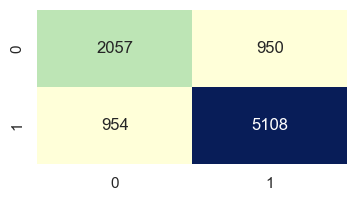

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(confusion_mat, annot=True, fmt="g", cbar=False, cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      3007
           1       0.84      0.84      0.84      6062

    accuracy                           0.79      9069
   macro avg       0.76      0.76      0.76      9069
weighted avg       0.79      0.79      0.79      9069



In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Accuracy: 0.7901
Precision: 0.8432
Recall: 0.8426
